<a href="https://colab.research.google.com/github/R-Mohammed-Hasan/ML-practice/blob/main/RAG%20using%20ColSmolVLM%20%26%20SmolVLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Tutorial:***
https://huggingface.co/learn/cookbook/multimodal_rag_using_document_retrieval_and_smol_vlm#4-retrieving-documents-with-the-document-retrieval-model-

In [1]:
!pip install -q git+https://github.com/sergiopaniego/byaldi.git@colsmolvlm-support

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 97.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from datasets import load_dataset

dataset = load_dataset("sergiopaniego/ourworldindata_example", split="train")

README.md:   0%|          | 0.00/328 [00:00<?, ?B/s]

(…)-standardized-deaths-from-all-causes.png:   0%|          | 0.00/932k [00:00<?, ?B/s]

annual-death-rate-by-age-group.png:   0%|          | 0.00/505k [00:00<?, ?B/s]

(…)rates-in-different-age-groups-by-sex.png:   0%|          | 0.00/483k [00:00<?, ?B/s]

(…)-death-rates-in-different-age-groups.png:   0%|          | 0.00/669k [00:00<?, ?B/s]

(…)le-and-male-life-expectancy-at-birth.png:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

(…)ncy-vs-health-expenditure-per-capita.png:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

life-expectancy-hmd-unwpp.png:   0%|          | 0.00/950k [00:00<?, ?B/s]

life-expectancy.png:   0%|          | 0.00/682k [00:00<?, ?B/s]

life-expectation-at-birth-by-sex.png:   0%|          | 0.00/568k [00:00<?, ?B/s]

(…)at-year-among-females-of-a-given-age.png:   0%|          | 0.00/835k [00:00<?, ?B/s]

(…)that-year-among-males-of-a-given-age.png:   0%|          | 0.00/876k [00:00<?, ?B/s]

(…)die-in-the-first-year-of-life-by-sex.png:   0%|          | 0.00/490k [00:00<?, ?B/s]

(…)ng-life-expectancy-at-different-ages.png:   0%|          | 0.00/547k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/13 [00:00<?, ? examples/s]

In [3]:
import os
from PIL import Image


def save_images_to_local(dataset, output_folder="data/"):
    os.makedirs(output_folder, exist_ok=True)

    for image_id, image_data in enumerate(dataset):
        image = image_data["image"]

        if isinstance(image, str):
            image = Image.open(image)

        output_path = os.path.join(output_folder, f"image_{image_id}.png")

        image.save(output_path, format="PNG")

        print(f"Image saved in: {output_path}")


save_images_to_local(dataset)

Image saved in: data/image_0.png
Image saved in: data/image_1.png
Image saved in: data/image_2.png
Image saved in: data/image_3.png
Image saved in: data/image_4.png
Image saved in: data/image_5.png
Image saved in: data/image_6.png
Image saved in: data/image_7.png
Image saved in: data/image_8.png
Image saved in: data/image_9.png
Image saved in: data/image_10.png
Image saved in: data/image_11.png
Image saved in: data/image_12.png


In [4]:
import os
from PIL import Image


def load_png_images(image_folder):
    png_files = [f for f in os.listdir(image_folder) if f.endswith(".png")]
    all_images = {}

    for image_id, png_file in enumerate(png_files):
        image_path = os.path.join(image_folder, png_file)
        image = Image.open(image_path)
        all_images[image_id] = image

    return all_images


all_images = load_png_images("/content/data/")

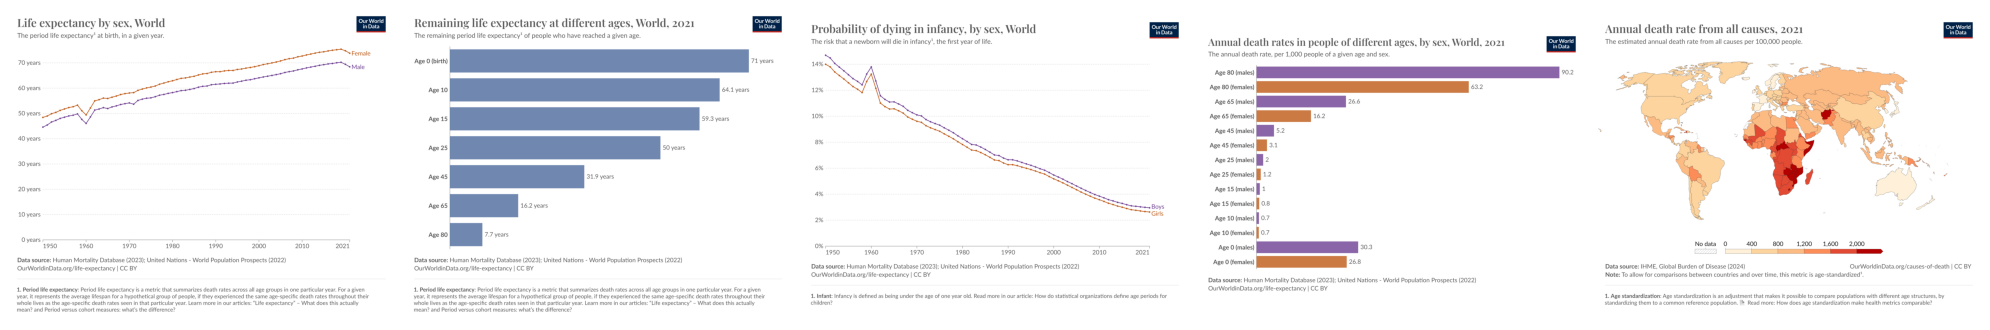

In [5]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(20, 15))

for i, ax in enumerate(axes.flat):
    img = all_images[i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [8]:
from byaldi import RAGMultiModalModel

docs_retrieval_model = RAGMultiModalModel.from_pretrained("vidore/colsmolvlm-alpha", device=0)

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

adapter_model.safetensors:   0%|          | 0.00/72.4M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/489 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/4.43k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/801k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/92.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/68.0 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


In [ ]:
docs_retrieval_model.index(
    input_path="data/", index_name="image_index", store_collection_with_index=False, overwrite=True
)

Indexing file: data/image_8.png


In [ ]:
text_query = "What is the overall trend in life expectancy across different countries and regions?"

results = docs_retrieval_model.search(text_query, k=1)
results